## Project Flow

1. Data preprocessing
2. Summary Stats
3. Data visualization for EDA
4. Results

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 

## 1. Data Cleaning and Pre processing

In [2]:
#load the data
df = pd.read_csv('all_data.csv')

#print a sample of dataset
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Variables Summary:

In [3]:

#check for duplicates
df.duplicated().sum()

#check for missing data
df.isna().sum()

#display the columns datatypes
display(df.dtypes)

#Change column names to lower case
df.columns = [x.lower() for x in df.columns]

#Rename life expectancy column name for ease of use
df.rename(columns ={'life expectancy at birth (years)': 'life_expectancy'}, inplace=True)

#Rename United States of America to U.S.A

df['country'].replace('United States of America', 'USA', inplace=True)

#Check that it worked and also that the data looks as expected(No missing values)
df.info()

#Scaling down gdp to billions
df.gdp = df.gdp/1000000000

#display unique countries and years
countries = df.country.unique().tolist()
print(countries)

#display unique years
years = df.year.unique().tolist()
print(years)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


## 2 Summary Stats

In [4]:
#mean life expectancy for every country
average_life_expectancy = df.groupby('country', as_index=False).life_expectancy.mean().sort_values(by='life_expectancy', ascending=False).round(2).reset_index().drop(columns='index')
display(average_life_expectancy)

#mean GDP for every country

average_GDP = df.groupby('country',as_index=False).gdp.mean().sort_values(by='country', ascending=True).round(2).reset_index().drop(columns='index')
display(average_GDP)

#mean GDP of every country in year 2000 compared to year 2015
#average_GDP_2000 = df.groupby('country', as_index=False).gdp.mean().sort_values(by='years').reset_index().drop(columns='index')
#display(average_GDP_2000)
#average_GDP_2015 = df.groupby('country', as_index=False).gdp.mean().sort_values(by='years').reset_index().drop(columns='index')
#display(average_GDP_2015)

,country,life_expectancy
0,Germany,79.66
1,Chile,78.94
2,USA,78.06
3,Mexico,75.72
4,China,74.26
5,Zimbabwe,50.09


,country,gdp
0,Chile,169.79
1,China,4957.71
2,Germany,3094.78
3,Mexico,976.65
4,USA,14075.00
5,Zimbabwe,9.06


In [5]:
#get the interquartile range for each country
iqr_range = {}

for x in df.country:
    data = df[df['country'] == x]
    
    q1, q3 = np.percentile(data.life_expectancy,[25, 75])
    
    iqr_range[x] = round(q3 - q1, 3) 
    
display(iqr_range)

{'Chile': 1.85,
 'China': 1.85,
 'Germany': 1.575,
 'Mexico': 0.925,
 'USA': 1.3,
 'Zimbabwe': 10.15}

## 3. Data Visualization for EDA

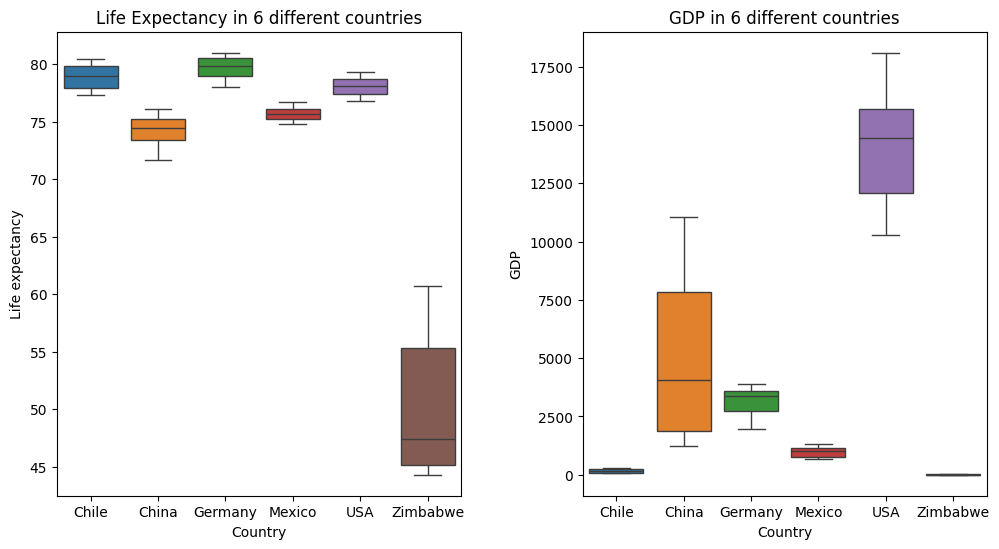

<Figure size 640x480 with 0 Axes>

In [6]:
#plot life expectancy and GDP in 6 countries

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='country', y='life_expectancy', hue='country')
plt.xlabel('Country')
plt.ylabel('Life expectancy')
plt.title('Life Expectancy in 6 different countries')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='country', y='gdp', hue='country')
plt.subplots_adjust(wspace= 0.3, bottom = 0.3)
plt.title('GDP in 6 different countries')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.show()
plt.clf()



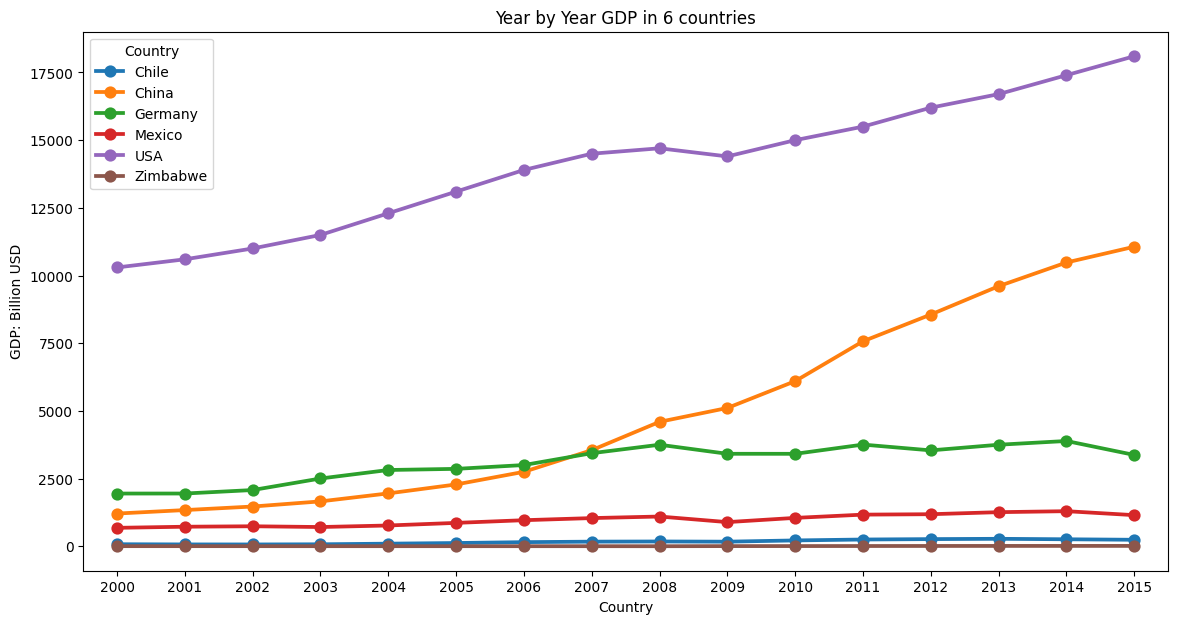

<Figure size 640x480 with 0 Axes>

In [7]:
#year by year comparison for each country
plt.figure(figsize=(14,7))
sns.pointplot(data=df, x='year', y='gdp', hue='country')
plt.xlabel('Country')
plt.ylabel('GDP: Billion USD')
plt.title('Year by Year GDP in 6 countries')
plt.legend(title='Country')
plt.show()
plt.clf()


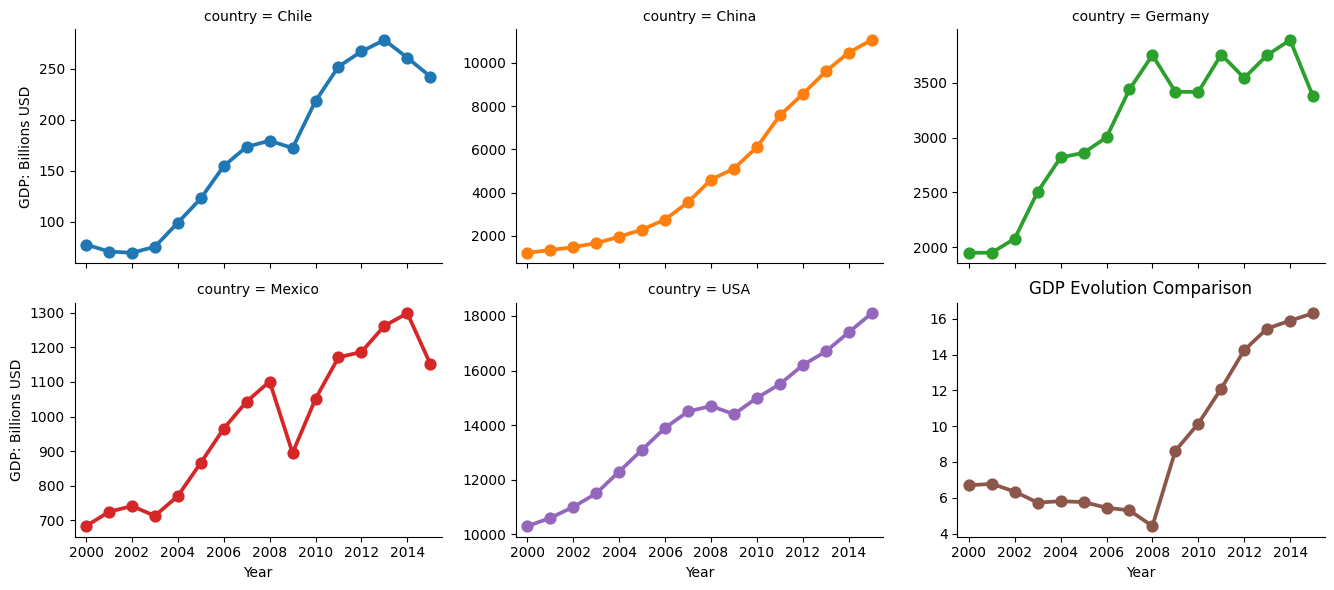

<Figure size 640x480 with 0 Axes>

In [8]:
#Facet Grid for GDP evolution by country
g = sns.FacetGrid(df, col='country', hue='country', col_wrap=3, sharey=False, aspect=1.5)
g.map_dataframe(sns.pointplot, x='year', y='gdp')
g.set_axis_labels('Year' ,'GDP: Billions USD')

plt.xticks(np.arange(0, len(years), 2))
plt.title('GDP Evolution Comparison')


plt.show()
plt.clf()



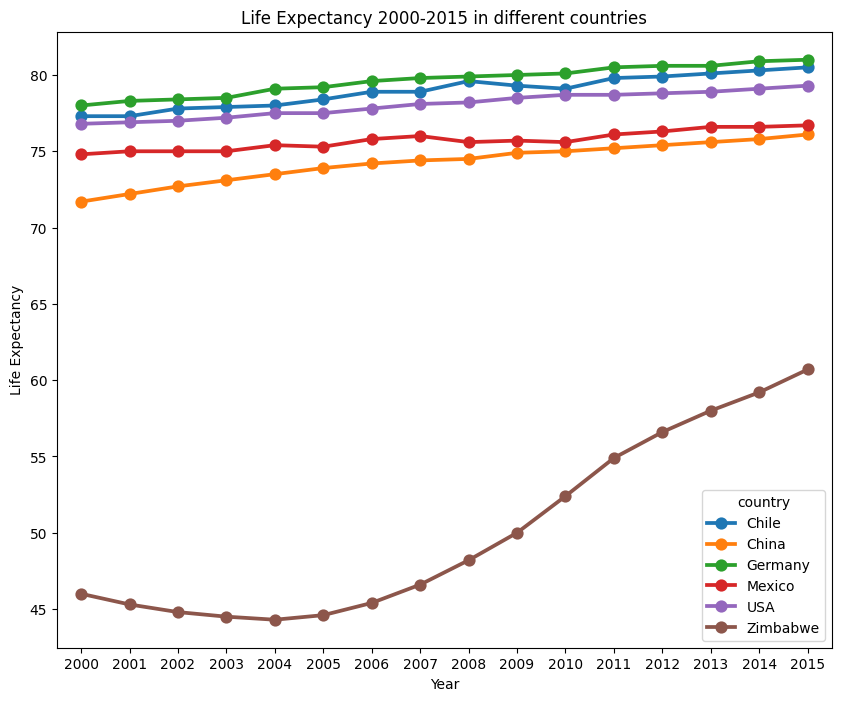

In [9]:
#year over year graph for life extectancy by country
plt.figure(figsize=(10,8))
sns.pointplot(data=df, x='year', y='life_expectancy', hue='country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy 2000-2015 in different countries')
plt.show()

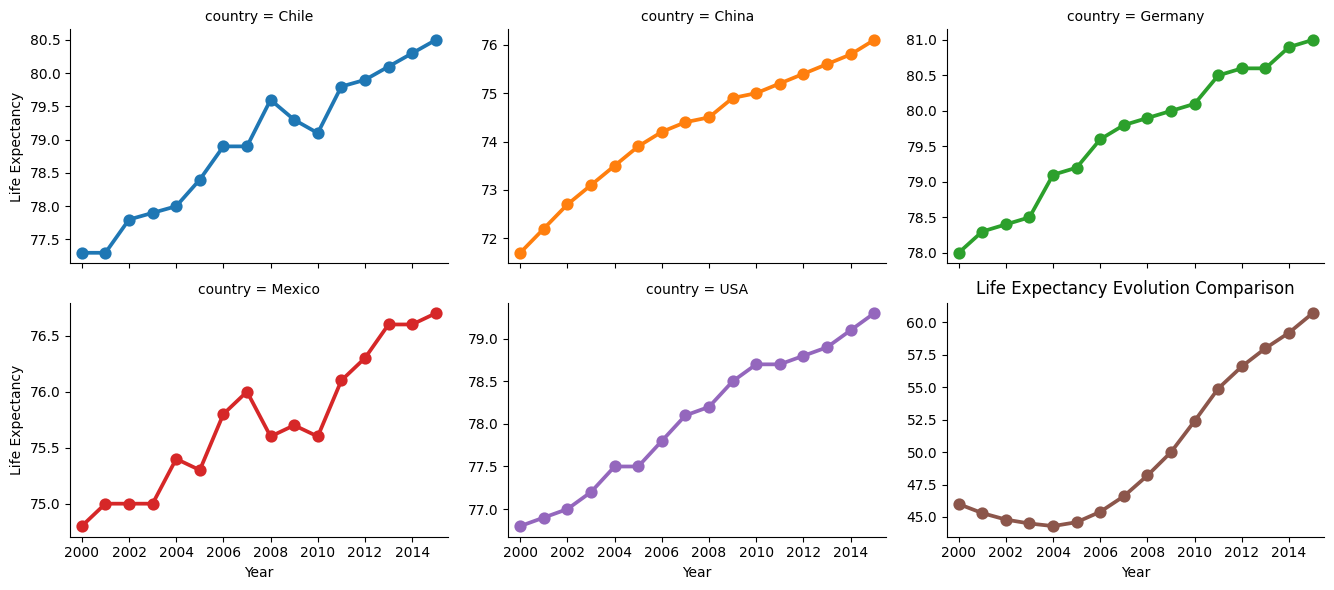

<Figure size 640x480 with 0 Axes>

In [10]:
#Facet Grid to compare life-expectancy
f = sns.FacetGrid(df, col='country', hue='country', col_wrap=3, sharey=False, aspect=1.5)
f.map_dataframe(sns.pointplot, x='year', y='life_expectancy')
f.set_axis_labels('Year' ,'Life Expectancy')

plt.xticks(np.arange(0, len(years), 2))
plt.title('Life Expectancy Evolution Comparison')

plt.show()
plt.clf()


ValueError: num must be an integer with 1 <= num <= 6, not 7

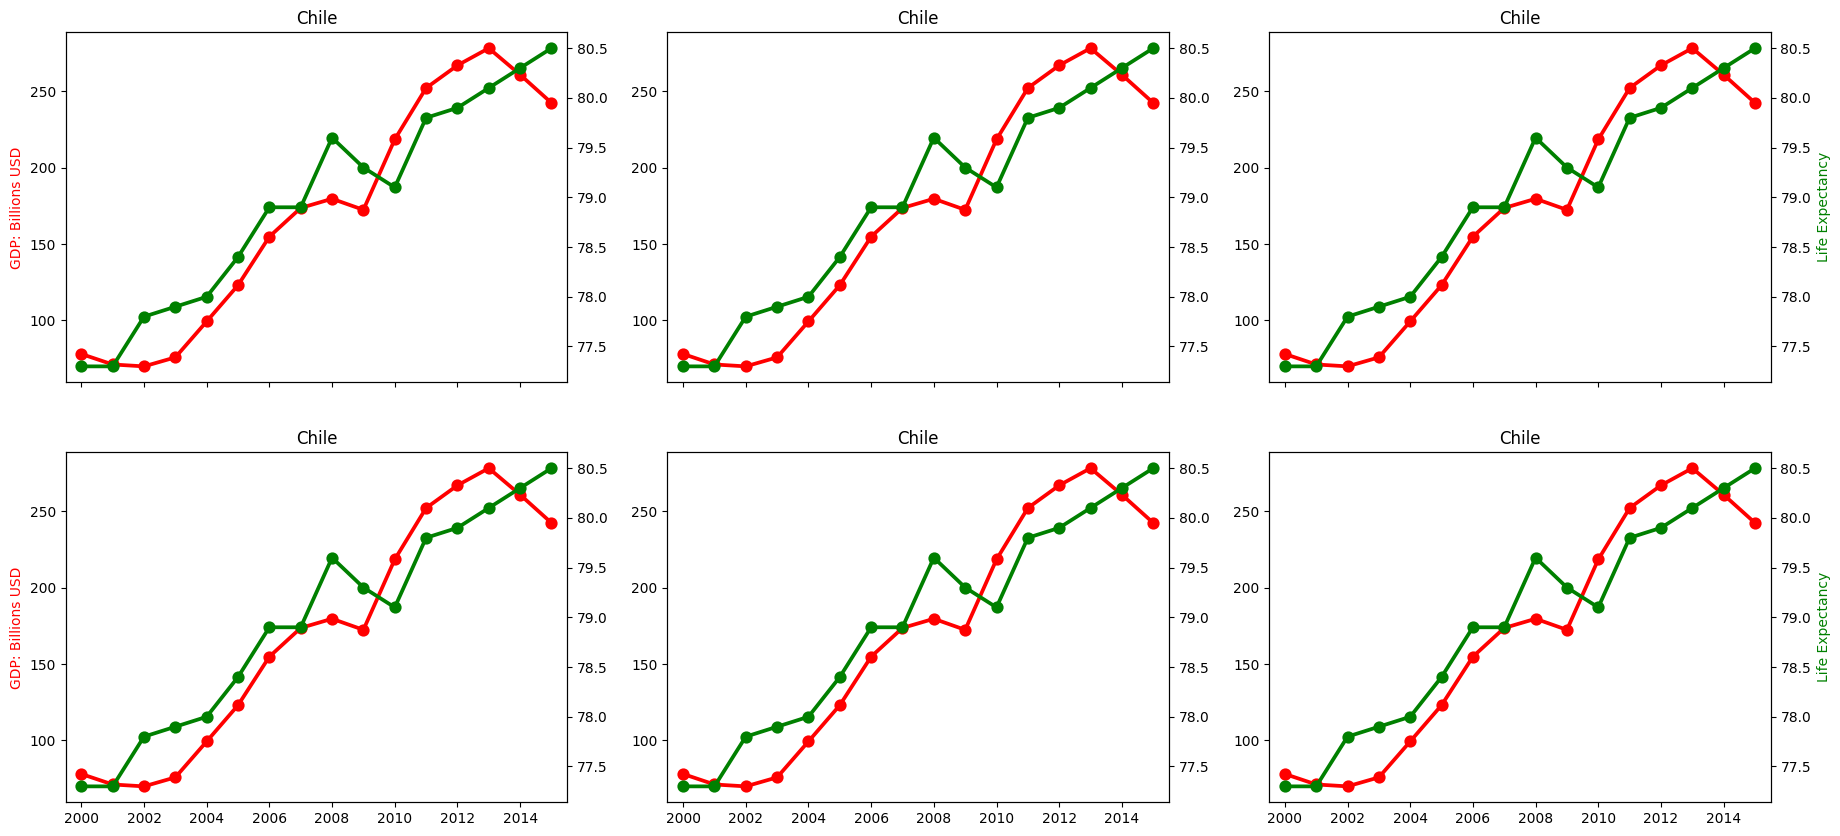

In [11]:
# Create a custom pointplot for each country displaying gdp and life expectancy on seperate axes

fig = plt.figure(figsize=(22,10))

for numb, name in enumerate(df.country, 1):
    

    ax1 = plt.subplot(2,3,numb)
    
    sns.pointplot(x=df[df.country == name].year, y=df[df.country == name].gdp, color='red')
    plt.ylabel('GDP: Billions USD', color='red')
    plt.xlabel('Year', fontsize=10)
    ax1.set_xlabel('')
    
    #create a second axis on the same plot
    ax2 = ax1.twinx()
    
    sns.pointplot(x=df[df.country == name].year, y=df[df.country == name].life_expectancy, color='green')
    ax2.set_ylabel('Life Expectancy', color='green')
    plt.title(name)
    
    
    
    if numb in([1,2,3]):
        plt.xticks(np.arange(0, len(years), 2))
        ax1.set_xticklabels('')
    else:
        plt.xticks(np.arange(0, len(years), 2))
    
    if numb in([2,3,5,6]):
        ax1.set_ylabel('')
    else:
        pass
    
    if numb in([1,2,4,5]):
        ax2.set_ylabel('')
    else:
        pass


plt.tight_layout(pad=1.5)
plt.subplots_adjust(wspace= 1.2)
plt.show()
plt.clf()

6


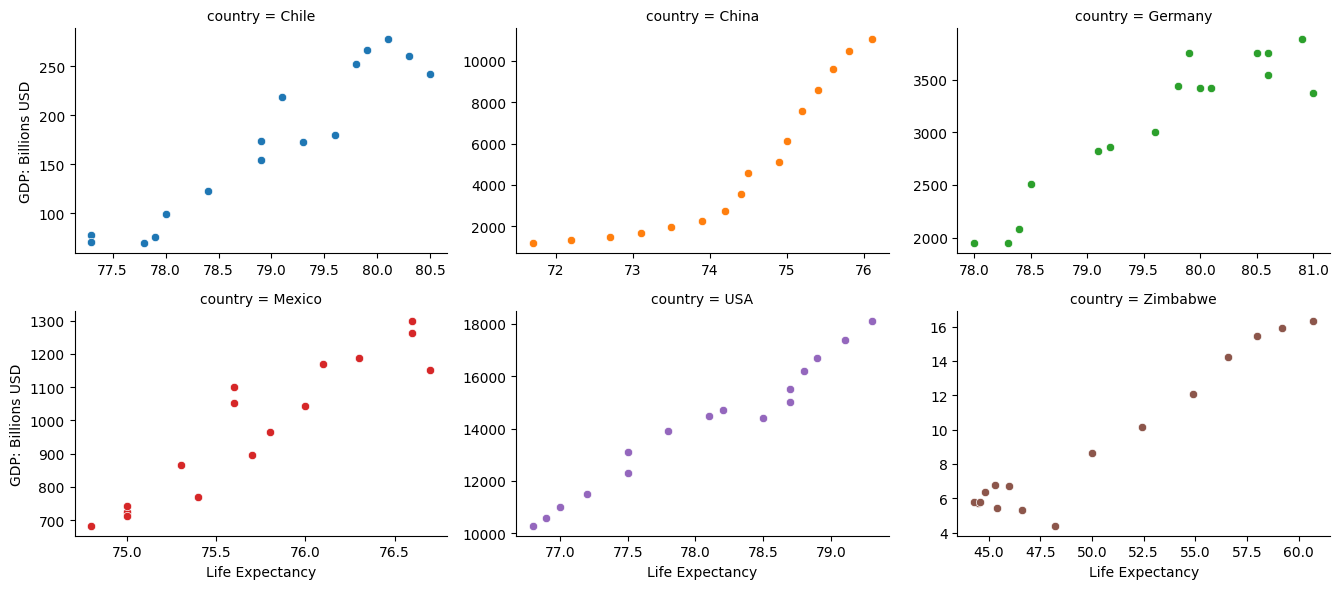

In [ ]:
#check the number of countries in case code raises error
num_countries = len(df['country'].unique())
print(num_countries)

#Facet Grid to compare how GDP and life expectancy evolved
j = sns.FacetGrid(data=df, col='country', hue='country', aspect=1.5, sharex=False, sharey=False, col_wrap=3)
j.map_dataframe(sns.scatterplot, x='life_expectancy', y='gdp')
j.set_axis_labels('Life Expectancy', 'GDP: Billions USD')

plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
#calculate the correlation between gdp and life expectancy
gdp_life_exp_corr = df.gdp.corr(df.life_expectancy)
print(gdp_life_exp_corr)
#year and life expectancy
df.year.corr(df.life_expectancy)


0.34320674844915594


0.15504970687355407

## Results

**Main Results**

1. highest average life expectanct: Germany, Zimbabwe
2. highest and lowest average GDP: USA, Zimbabwe

From Data Visual clearly emerges that Zimbabwe is an outlier, with the lowest average GDP and life expectancy.
Moreover:

- China's average GDP in 15 years is left skewed. 
- Zimbabwe's average life expectancy in 15 years is left skewed.
- China has undergone the greatest rise in GDP during the last 15 years.
- Life Expectancy pretty constant in all states across 15 years, apart from Zimbabwe.
- From double line graphs life expectancy seems to be positively correlated with GDP.

However, when computing correlation between GDP and life expectancy, we found only a modest positive correlation (34%).
 